# League of Legends Statistics EDA and Kills vs Deaths SVM Classification

This jupyter notebook demonstrates the power of Support Vector Machines in predicting the outcome given two features

### Importing Libraries


In [1]:
import pandas as pd
from sklearn import svm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.ioff()
DATA_DIR = "../../../data/"
print(os.listdir(DATA_DIR))

['CleanLoLMatchHistory2.csv', 'openaq.csv', 'CleanLoLMatchHistory3.csv', '.DS_Store', 'LoLMatchHistory.txt', 'CleanLoLMatchHistory.csv', 'LoL Match Making Statistics.ipynb', '.ipynb_checkpoints', 'CleanLoLMatchHistory3.xlsx', 'LolUpdatedStats.txt', 'CleanLoLMatchHistoryUpdate.csv']


In [2]:
filename = DATA_DIR + "CleanLoLMatchHistory2.csv"
df = pd.read_csv(filename)
df.head()

,Level,Champion,Score,Game Mode,Creep Score,Gold,Minutes,Date,Rank,Experience Gained,Kills,Deaths,Assists,Game Status
0,15,Vayne,C / +188 XP,Summoner's Rift,169,9.8k,33:44:00,10/14/2018,C,188,3,6,6,-1
1,16,Shen,B- / +223 XP,Summoner's Rift,144,11.8k,40:20:00,10/13/2018,B-,223,5,7,15,-1
2,12,Shen,A-,Summoner's Rift,39,6.2k,25:50:00,10/13/2018,A-,0,0,0,13,1
3,12,Vayne,A+ / +146 XP,Summoner's Rift,137,9.9k,21:05,10/13/2018,A+,146,9,2,8,1
4,12,Vayne,B+ / +144 XP,Summoner's Rift,86,8.4k,20:53,10/13/2018,B+,144,6,2,6,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 14 columns):
Level                56 non-null int64
Champion             56 non-null object
Score                52 non-null object
Game Mode            56 non-null object
Creep Score          56 non-null int64
Gold                 56 non-null object
Minutes              56 non-null object
Date                 56 non-null object
Rank                 45 non-null object
Experience Gained    56 non-null int64
Kills                56 non-null int64
Deaths               56 non-null int64
Assists              56 non-null int64
Game Status          56 non-null int64
dtypes: int64(7), object(7)
memory usage: 6.2+ KB


In [4]:
df.describe()

,Level,Creep Score,Experience Gained,Kills,Deaths,Assists,Game Status
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,12.732143,88.071429,167.357143,6.553571,4.785714,8.517857,0.089286
std,3.381721,62.953044,158.806506,6.429816,3.137540,6.633225,0.995933
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,11.000000,34.000000,100.750000,2.000000,2.000000,4.000000,-1.000000
50%,12.500000,82.500000,150.000000,4.500000,5.000000,7.000000,1.000000
75%,15.250000,127.250000,198.250000,9.000000,8.000000,12.000000,1.000000
max,18.000000,269.000000,930.000000,25.000000,11.000000,31.000000,1.000000


### Visual EDA

We rename the columns of the dataframe to a more code friendly format so it will be easier to access each column in the DataFrame as we move along


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,level,champion,score,game_mode,creep_score,gold,minutes,date,rank,experience_gained,kills,deaths,assists,game_status
0,15,Vayne,C / +188 XP,Summoner's Rift,169,9.8k,33:44:00,10/14/2018,C,188,3,6,6,-1
1,16,Shen,B- / +223 XP,Summoner's Rift,144,11.8k,40:20:00,10/13/2018,B-,223,5,7,15,-1
2,12,Shen,A-,Summoner's Rift,39,6.2k,25:50:00,10/13/2018,A-,0,0,0,13,1
3,12,Vayne,A+ / +146 XP,Summoner's Rift,137,9.9k,21:05,10/13/2018,A+,146,9,2,8,1
4,12,Vayne,B+ / +144 XP,Summoner's Rift,86,8.4k,20:53,10/13/2018,B+,144,6,2,6,1


In order to show the correlation between our features, we plot them in a correlation heat map and pairplot

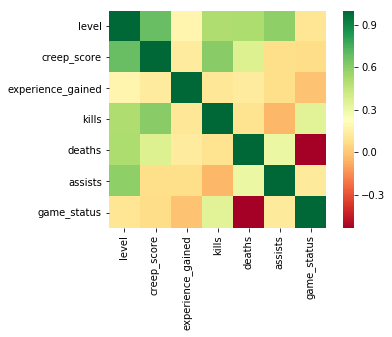

In [6]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

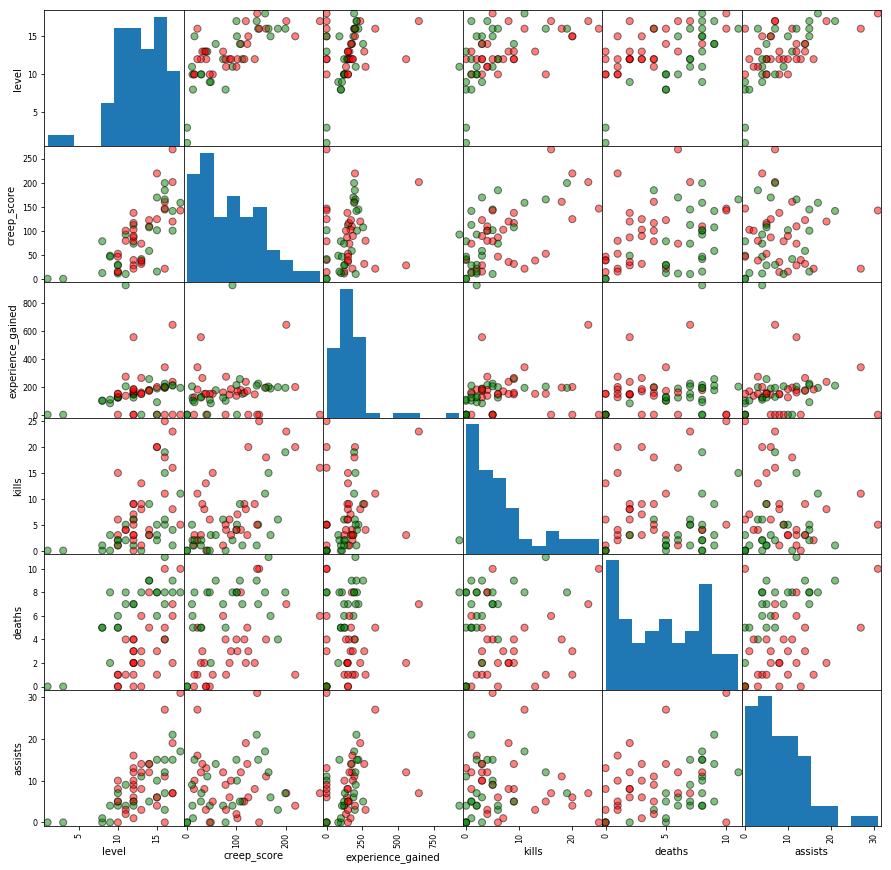

In [7]:
color_list = ['red' if i== 1 else 'green' for i in df.loc[:,'game_status']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'game_status'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       edgecolor= "black")
plt.show()

We check the distribution of our KDA

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


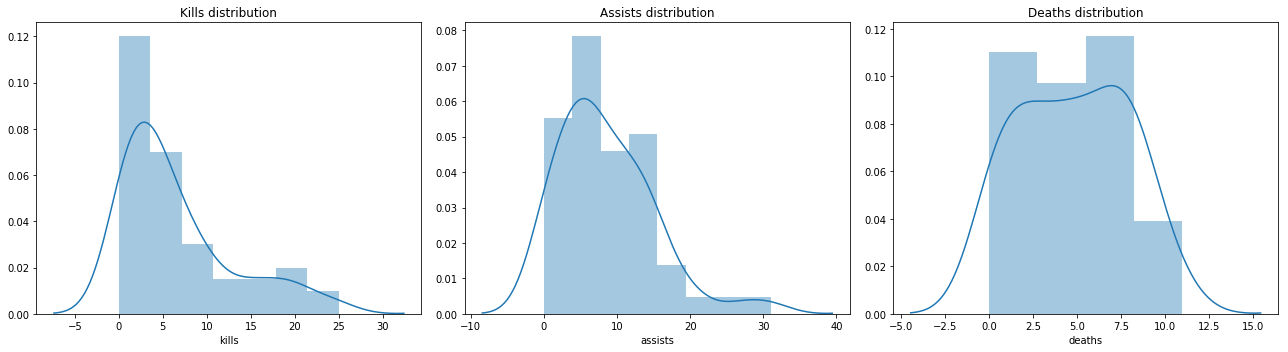

In [8]:
plt.figure(figsize = (18,5))
plt.subplot(131)
sns.distplot(df.kills)
plt.title("Kills distribution")

plt.subplot(132)
sns.distplot(df.assists)
plt.title("Assists distribution")

plt.subplot(133)
sns.distplot(df.deaths)
plt.title("Deaths distribution")
plt.tight_layout()
plt.show()

Now that we have visualized the correlation and pair plots between our features, we will be converting the game_status (Game Outcome) to a string format to make it easier for us to understand the plots later on :)

In [9]:
def get_status(n):
    if n == 1:
        return 'Win'
    elif n == 0:
        return 'Draw'
    elif n == -1:
        return 'Lose'
    
df.game_status = df.game_status.apply(get_status)
count_values = df.groupby('game_status').game_status.count()

print(count_values)
print("Win Percentage: {0:.2f}%".format(count_values[1]/count_values[0] + count_values[-1]))

game_status
Draw     1
Lose    25
Win     30
Name: game_status, dtype: int64
Win Percentage: 55.00%


Having compared all the scatter plots from feature to feature, deaths and kills seem to be good candidates to be fit in the SVM for classification

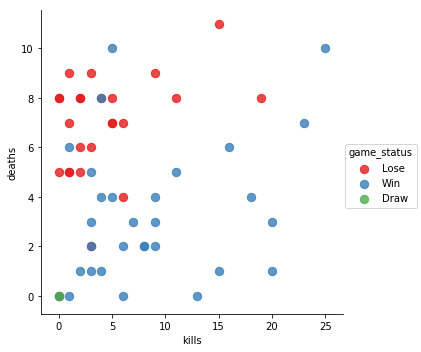

In [10]:
sns.lmplot('kills','deaths', data=df, hue='game_status', palette='Set1', fit_reg=False, scatter_kws={"s":70})

plt.show()

It is now time for us to specify the inputs to be fit in the SVM model. We will dumping the kills and deaths columns into a matrix while creating our target classifications.

In [11]:
#Specify inputs for the model
kills_deaths = df[['kills','deaths']].as_matrix()
game_status_label=np.where(df['game_status']=="Win", 0, 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [12]:
#Fit the SVM model
model = svm.SVC(kernel="linear", C= 1, gamma= 0.01)
model.fit(kills_deaths,game_status_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now that that we have fit the features into the model, we are now ready to visualize the features along with the hyperplane

In [13]:
#Get the separating hyperplane
w = model.coef_[0]
a = -w[0] /w[1]
xx = np.linspace(0,30)
yy = a * xx - (model.intercept_[0] /w[1])

#Plot the parallels to the separating hyperplane
#that pass through the support vectors

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

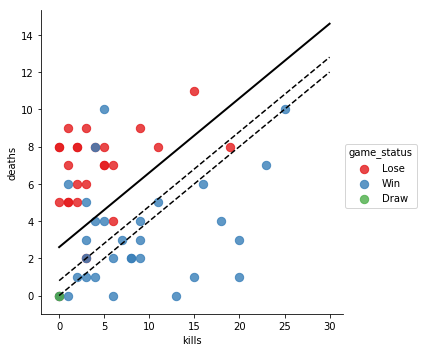

In [14]:
#Look at the margins and support vectors
sns.lmplot('kills','deaths', data=df, hue='game_status', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s=80, facecolors='none')
plt.show()

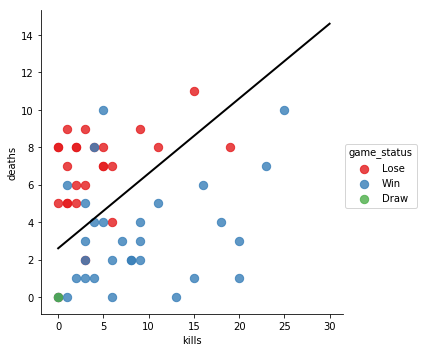

In [15]:
#Plot the hyperplane
sns.lmplot('kills','deaths', data=df, hue='game_status', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.show()

### Predicting a new case

We have finished visualizing the hyperplane produced by the SVM model, and we are now ready to predict whether or not we will win based on our Kills/Deaths

In [16]:
# Create a function to guess when K/D predicts a Win or loss using SVM
def win_or_lose(kills, deaths):
    if(model.predict([[kills, deaths]])) == 0:
        return "Win"
    else:
        return "Lose"
        

In [17]:
df_updated = pd.read_csv(DATA_DIR + "CleanLoLMatchHistoryUpdate.csv")
df_updated.game_status = df_updated.game_status.apply(get_status)


In [18]:
predictions = []

kills = df_updated['kills'].values
deaths = df_updated['deaths'].values

for i in range(0, len(df_updated)):
    print(kills[i])
    predictions.append(win_or_lose(kills[i],deaths[i]))
    
updated = np.array(df_updated['game_status'].values)
pred = np.array(predictions)

accuracy = (updated == pred)

print(predictions)
print('With SVM Linear accuracy is: ', (np.count_nonzero(accuracy == True)/len(accuracy)))

1
0
11
1
4
0
6
3
7
2
2
1
1
['Win', 'Win', 'Win', 'Lose', 'Win', 'Lose', 'Win', 'Win', 'Win', 'Lose', 'Lose', 'Win', 'Lose']
With SVM Linear accuracy is:  0.6923076923076923


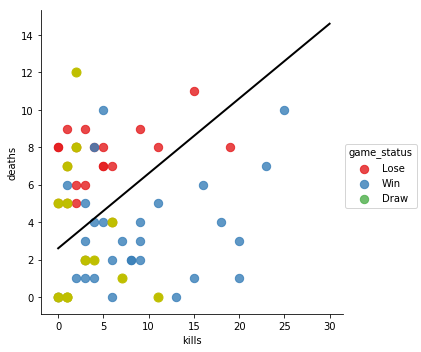

In [19]:
#Plot the newly predicted point visually
sns.lmplot('kills','deaths', data=df, hue='game_status', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(kills,deaths,'yo',markersize='9')
plt.show()


In [20]:
#Specify inputs for the model
kills_deaths = df[['kills','deaths','assists']].as_matrix()
game_status_label=np.where(df['game_status']=="Win", 0, 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
# Setup the pipeline
steps = [
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='linear'))
]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {
    'SVM__C': [1, 10, 100],
    'SVM__gamma': [0.1, 0.01]
}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(kills_deaths,
                                                    game_status_label,
                                                    test_size = 0.2,
                                                    random_state = 21
                                                    )

cv = GridSearchCV(pipeline, parameters, cv=3)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8333333333333334
             precision    recall  f1-score   support

          0       0.86      0.86      0.86         7
          1       0.80      0.80      0.80         5

avg / total       0.83      0.83      0.83        12

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

In [22]:
#Get the separating hyperplane
w = model.coef_[0]
a = -w[0] /w[1]
xx = np.linspace(0,30)
yy = a * xx - (model.intercept_[0] /w[1])

#Plot the parallels to the separating hyperplane
#that pass through the support vectors

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [ ]:
#Look at the margins and support vectors
sns.lmplot('kills','deaths', data=df, hue='game_status', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:, 1], s=80, facecolors='none')
plt.show()